<a href="https://colab.research.google.com/github/Arjunb79/DS-ML-LAB/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt


In [38]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [39]:
x_train.shape

(50000, 32, 32, 3)

In [40]:
x_test.shape

(10000, 32, 32, 3)

In [41]:
x_train=x_train.reshape(50000,32,32,3).astype('float64')
x_test=x_test.reshape(10000,32,32,3).astype('float64')


In [42]:
x_train/=255
x_test/=255

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [44]:
cnn=Sequential()
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))

In [45]:
cnn.add(MaxPool2D((2,2)))

In [46]:
cnn.add(Conv2D(32,activation='relu',kernel_size=(3,3)))

In [47]:
cnn.add(MaxPool2D((2,2)))

In [49]:
cnn.add(Flatten())

In [51]:
cnn.add(Dense(64,activation='sigmoid'))

In [53]:
cnn.add(Dense(10,activation='softmax'))

In [55]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [56]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
cnn.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 62s 39ms/step - loss: 2.0426 - accuracy: 0.2142
Epoch 2/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.8375 - accuracy: 0.2564
Epoch 3/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.7631 - accuracy: 0.2790
Epoch 4/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.6702 - accuracy: 0.3476
Epoch 5/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5621 - accuracy: 0.4047
Epoch 6/20
1563/1563 [==============================] - 57s 37ms/step - loss: 1.4750 - accuracy: 0.4536
Epoch 7/20
1563/1563 [==============================] - 60s 38ms/step - loss: 1.3995 - accuracy: 0.4861
Epoch 8/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3263 - accuracy: 0.5180
Epoch 9/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2680 - accuracy: 0.5415
Epoch 10/20
1563/1563 [==============================] - 59s 38m

In [61]:
re=cnn.evaluate(x_test,y_test)
re

313/313 [==============================] - 4s 14ms/step - loss: 1.3384 - accuracy: 0.5729


[1.338437795639038, 0.5728999972343445]

In [62]:
import matplotlib.pyplot as plt

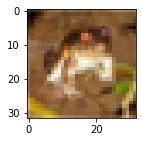

In [64]:
plt.figure(figsize=(5,2))
plt.imshow(x_train[0])